In [1]:
from thundersvm import SVC
from utility import *

In [2]:
train_X=pd.read_csv('dataset/train_X.csv')
test_X=pd.read_csv('dataset/test_X.csv')

train_y=pd.read_csv('dataset/train_y.csv')
test_y=pd.read_csv('dataset/test_y.csv')

SVM with RBF Kernel

In [3]:
model=SVC(kernel='rbf',n_jobs=-1)

properties={'C':[150,200,250,300,350]}

In [4]:
model_name='SVM_RBF'

if 'model' in globals():
    
    best_model,result=model_selector(model,properties,train_X,train_y)
    save(best_model,result,model_name)
    
else:
    from thundersvm import SVC
    from utility import *
    
    train_X=pd.read_csv('dataset/train_X.csv')
    test_X=pd.read_csv('dataset/test_X.csv')

    train_y=pd.read_csv('dataset/train_y.csv')
    test_y=pd.read_csv('dataset/test_y.csv')
    
    best_model,result=load(model_name)

Best Score:  0.9742000000000001
Best Params:  {'C': 200}


In [9]:
for col in result:
    print(col)
result[["param_C","mean_test_score"]]

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_C
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
split5_test_score
split6_test_score
split7_test_score
split8_test_score
split9_test_score
mean_test_score
std_test_score
rank_test_score
split0_train_score
split1_train_score
split2_train_score
split3_train_score
split4_train_score
split5_train_score
split6_train_score
split7_train_score
split8_train_score
split9_train_score
mean_train_score
std_train_score


,param_C,mean_test_score
0,0.05,0.898750
1,0.1,0.911883
2,0.5,0.933117
3,1,0.940383
4,10,0.961433
5,25,0.968400
6,50,0.970950
7,75,0.972433
8,100,0.973217
9,150,0.973883


In [6]:
pred_y=best_model.predict(test_X)

accuracy_score(test_y,pred_y)

0.9721

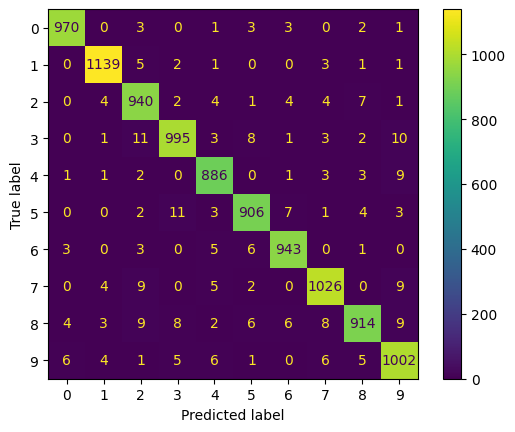

In [7]:
plot_confusion_matrix(test_y,pred_y)